# Challenge
This module:
- We learned how to approach and solve regression problems using linear regression models. Throughout the module, you worked on a house price dataset from Kaggle. In this challenge, you will keep working on this dataset.

The scenario:
- The housing market is one of the most crucial parts of the economy for every country. Purchasing a home is one of the primary ways to build wealth and savings for people. In this respect, predicting prices in the housing market is a very central topic in economic and financial circles.

- The house price dataset from Kaggle includes several features of the houses along with their sale prices at the time they are sold. So far, in this module, you built and implemented some models using this dataset.

- In this challenge, you are required to improve your model with respect to its prediction performance.

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks.

# Steps
- Load the houseprices data from Thinkful's database.
- Do data cleaning, exploratory data analysis, and feature engineering. You can use your previous work in this module. But make sure that your work is satisfactory.
- Now, split your data into train and test sets where 20% of the data resides in the test set.
- Build several linear regression models including Lasso, Ridge, or ElasticNet and train them in the training set. Use k-fold cross-validation to select the best hyperparameters if your models include one!
- Evaluate your best model on the test set.

So far, you have only used the features in the dataset. However, house prices can be affected by many factors like economic activity and the interest rates at the time they are sold. So, try to find some useful factors that are not included in the dataset. Integrate these factors into your model and assess the prediction performance of your model. Discuss the implications of adding these external variables into your model.

References:
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

Dealing with missing values and outliers.
https://www.kaggle.com/pavansanagapati/simple-tutorial-how-to-handle-missing-data

# Description of the dataset
Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

Reference:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
https://www.kaggle.com/agodwinp/stacking-house-prices-walkthrough-to-top-5

Step 1: Load the houseprices data from Thinkful's database.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

Step 2: Do data cleaning, exploratory data analysis, and feature engineering. You can use your previous work in this module. But make sure that your work is satisfactory.

In [3]:
# Display the first 5 rows in the house_prices_df.
house_prices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
# Display the last 5 rows in the house_prices_df.
house_prices_df.tail()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2008,WD,Normal,147500


In [5]:
# Display summary statistics of numerical and categorical variables.
house_prices_df.describe(include='all')

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [6]:
# Display information on the columns to detect missing values and datatypes.
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

# Display and Remove Outliers

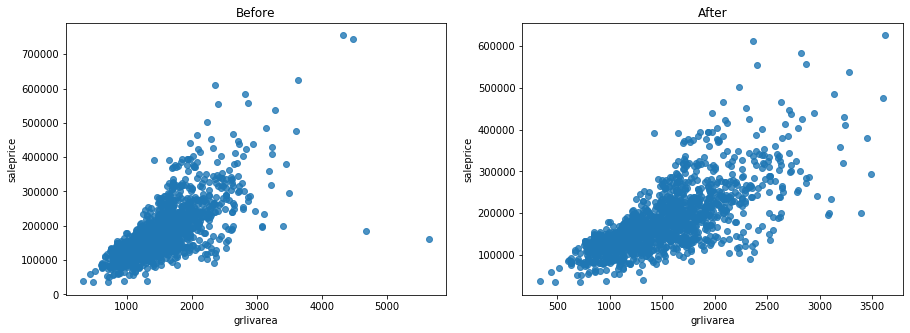

In [7]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=house_prices_df['grlivarea'], y=house_prices_df['saleprice'], fit_reg=False).set_title("Before")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
house_prices_df = house_prices_df.drop(house_prices_df[(house_prices_df['grlivarea']>4000)].index)
g = sns.regplot(x=house_prices_df['grlivarea'], y=house_prices_df['saleprice'], fit_reg=False).set_title("After")

In the before scatterplot, we see there are four houses with living area is more than 4000 square feet which is outside of the data.  I will remove those four data points because those values will skew the regression results.  In the after scatterplot, we can see how the data changed after removing the four data points.

# Addressing Missing Values

Based on the top and bottom of the datasets, I can see there are missing values.  I will treat the missing values based on the description of the dataset above.

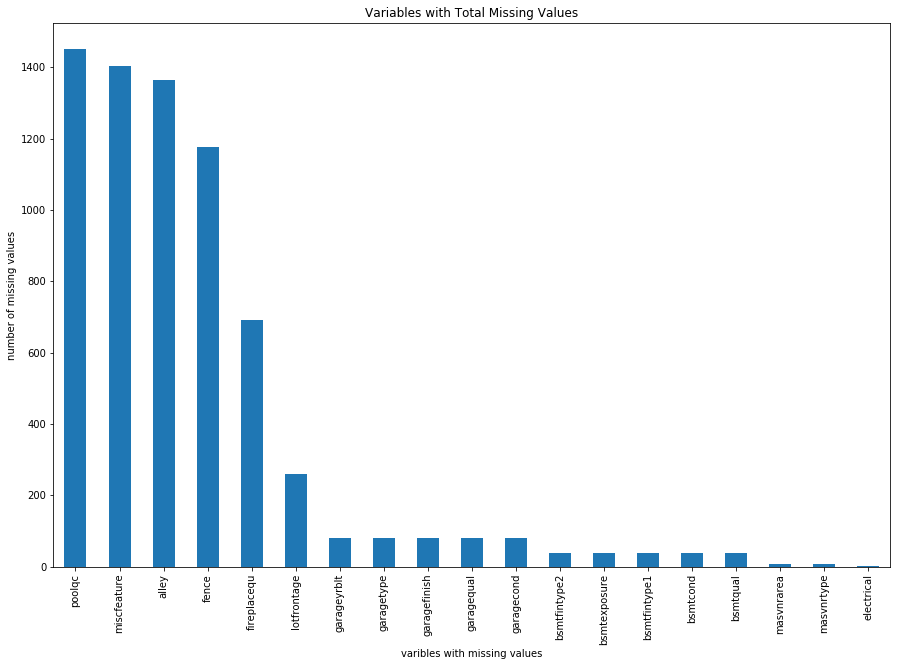

In [8]:
# Sum all null values for each variable.
house_prices_na_df = house_prices_df.isnull().sum()

# Display a bar chart with the variables with na values.
house_prices_na_df = house_prices_na_df.drop(house_prices_na_df[house_prices_na_df == 0].index).sort_values(ascending=False)
plt.subplots(figsize=(15, 10))
house_prices_na_df.plot(kind='bar')
plt.title('Variables with Total Missing Values')
plt.ylabel('number of missing values')
plt.xlabel('varibles with missing values')
plt.show()

In [9]:
# Display column names for inspection.
house_prices_df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paved

Based on the list of columns, I will not need to edit or rename any columns.

In [10]:
# Using data description, fill these missing values with "None" because the items do not exist.
for col in ("poolqc", "miscfeature", "alley", "fence", "fireplacequ",
           "garagetype", "garagefinish", "garagequal", "garagecond",
           "bsmtqual", "bsmtcond", "bsmtexposure", "bsmtfintype1",
            "bsmtfintype2", "mssubclass", "masvnrtype"):
    house_prices_df[col] = house_prices_df[col].fillna("None")

# Used the median value to impute because the lot in front is similar to other houses in the neighborhood.
house_prices_df["lotfrontage"] = house_prices_df.groupby("neighborhood")["lotfrontage"].transform(
    lambda x: x.fillna(x.median()))

# Base on the data description, I know missing values represent items do not exist; therefore,
# I will replace the missing values with 0. 
for col in ("garageyrblt", "garagearea", "garagecars", "bsmtfinsf1", 
           "bsmtfinsf2", "bsmtunfsf", "totalbsmtsf", "masvnrarea",
           "bsmtfullbath", "bsmthalfbath"):
    house_prices_df[col] = house_prices_df[col].fillna(0)

# Since there are low number of missing values, I will replace them with the mode (most frequent).
house_prices_df['mszoning'] = house_prices_df['mszoning'].fillna(house_prices_df['mszoning'].mode()[0])
house_prices_df['electrical'] = house_prices_df['electrical'].fillna(house_prices_df['electrical'].mode()[0])
house_prices_df['kitchenqual'] = house_prices_df['kitchenqual'].fillna(house_prices_df['kitchenqual'].mode()[0])
house_prices_df['exterior1st'] = house_prices_df['exterior1st'].fillna(house_prices_df['exterior1st'].mode()[0])
house_prices_df['exterior2nd'] = house_prices_df['exterior2nd'].fillna(house_prices_df['exterior2nd'].mode()[0])
house_prices_df['saletype'] = house_prices_df['saletype'].fillna(house_prices_df['saletype'].mode()[0])
house_prices_df["functional"] = house_prices_df["functional"].fillna(house_prices_df['functional'].mode()[0])

# Verify all the missing values have been replaced.
house_prices_df_na = house_prices_df.isnull().sum()
house_prices_df_na

id               0
mssubclass       0
mszoning         0
lotfrontage      0
lotarea          0
                ..
mosold           0
yrsold           0
saletype         0
salecondition    0
saleprice        0
Length: 81, dtype: int64

In [11]:
# Verify all the missing values have been replaced.
house_prices_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,80.0,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [12]:
# Drop irrelevant columns (id, utilities) to my predictive model.
house_prices_df = house_prices_df.drop(['utilities', 'id'], axis=1)

In [13]:
# Verify the columns were dropped.  They were dropped.  We started with 81 and now have 79 columns.
house_prices_df.shape

(1456, 79)

# Categorical Variable Analysis

In [14]:
# Splitting house_prices_df into a quantitative_df and qualitative_df to 
# explore the data.
# Numercial variables.
qualitative_df = [f for f in house_prices_df.columns if house_prices_df.dtypes[f] == 'object']

# Categorical variables.
quantitative_df = [f for f in house_prices_df.columns if house_prices_df.dtypes[f] != 'object']
quantitative_df

['mssubclass',
 'lotfrontage',
 'lotarea',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'yearremodadd',
 'masvnrarea',
 'bsmtfinsf1',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 'firstflrsf',
 'secondflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'totrmsabvgrd',
 'fireplaces',
 'garageyrblt',
 'garagecars',
 'garagearea',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 'threessnporch',
 'screenporch',
 'poolarea',
 'miscval',
 'mosold',
 'yrsold',
 'saleprice']

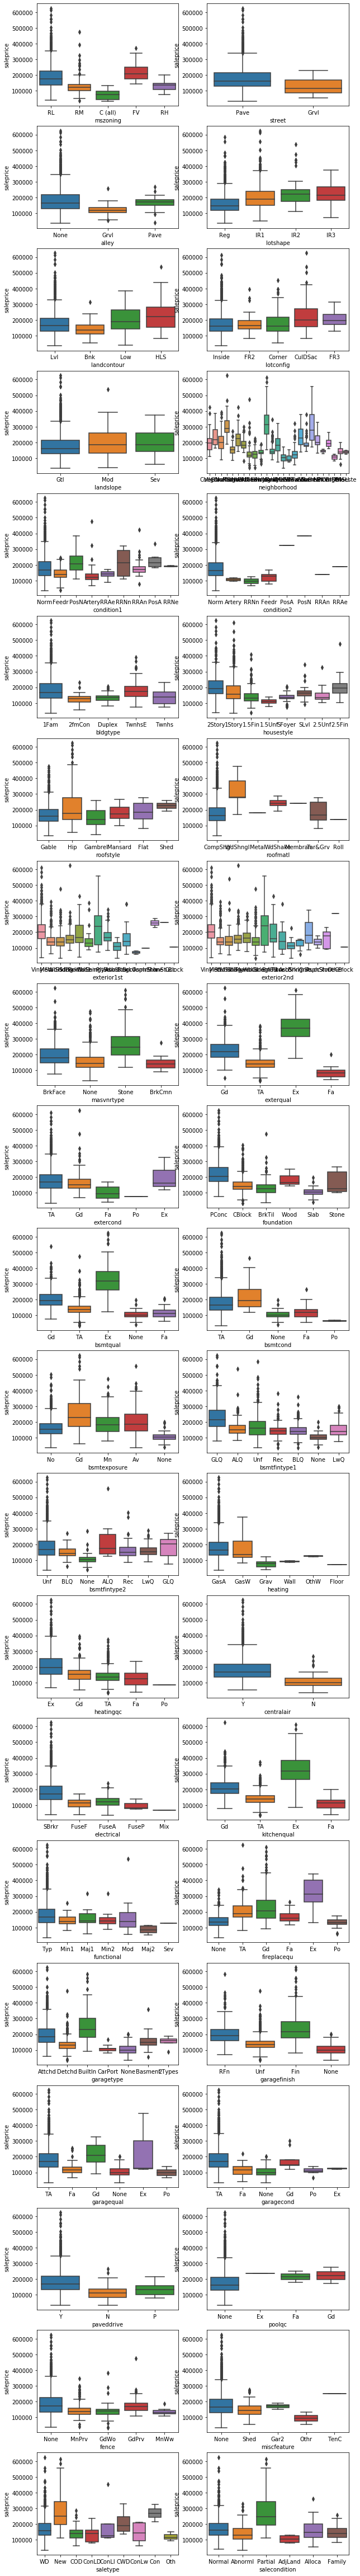

In [15]:
# Display boxplots of the categorical variables.
plt.figure(figsize=(10,100))
for i, col in enumerate(qualitative_df, start=1):
    plt.subplot(25, 2, i)
    sns.boxplot(x=house_prices_df[col], y="saleprice", data=house_prices_df)

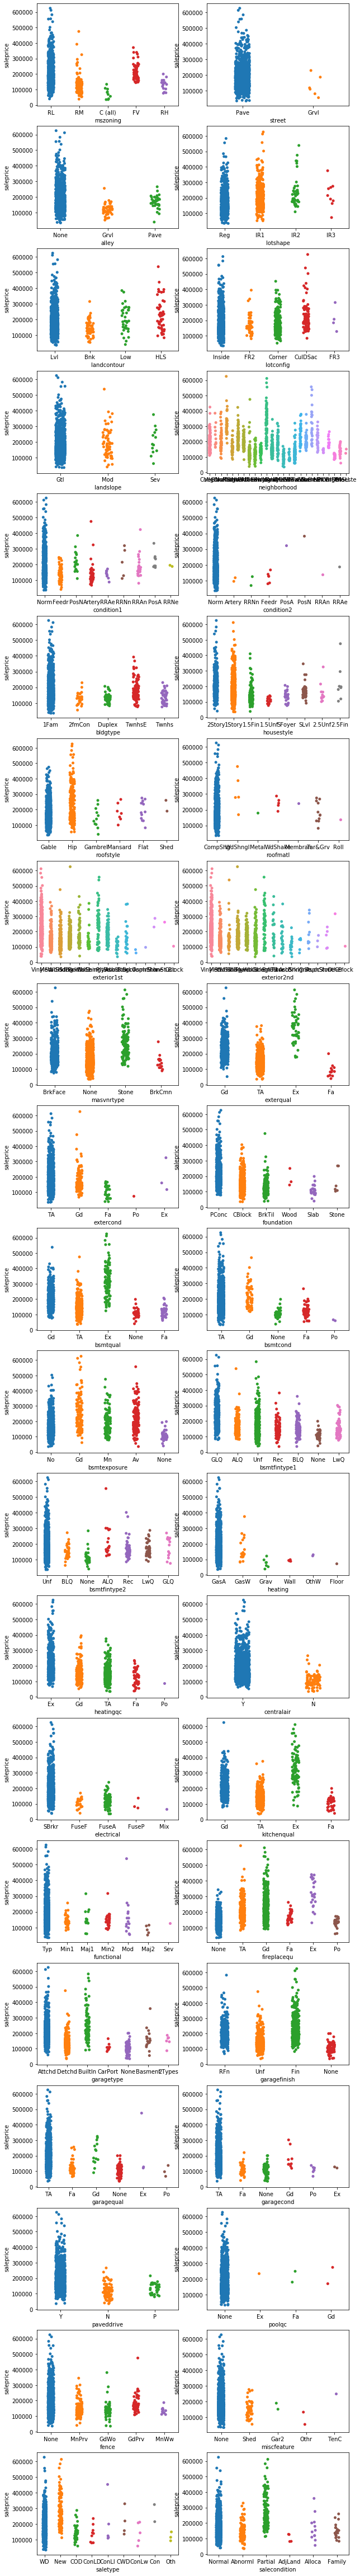

In [16]:
# Display stripplots of the categorical variables.
plt.figure(figsize=(10,100))
for i, col in enumerate(qualitative_df, start=1):
    plt.subplot(25, 2, i)
    sns.stripplot(x=house_prices_df[col], y="saleprice", data=house_prices_df)

Discuss the plots of the categorical variables.

# Numerical Variable Analysis

In [17]:
# Convert list into a Pandas dataframe.
quantitative_df = house_prices_df[quantitative_df]

In [18]:
# Display the first 5 rows of the numerical variable dataframe.
quantitative_df.head()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [19]:
# Verifying the columns are numerical.
quantitative_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 37 columns):
mssubclass       1456 non-null int64
lotfrontage      1456 non-null float64
lotarea          1456 non-null int64
overallqual      1456 non-null int64
overallcond      1456 non-null int64
yearbuilt        1456 non-null int64
yearremodadd     1456 non-null int64
masvnrarea       1456 non-null float64
bsmtfinsf1       1456 non-null int64
bsmtfinsf2       1456 non-null int64
bsmtunfsf        1456 non-null int64
totalbsmtsf      1456 non-null int64
firstflrsf       1456 non-null int64
secondflrsf      1456 non-null int64
lowqualfinsf     1456 non-null int64
grlivarea        1456 non-null int64
bsmtfullbath     1456 non-null int64
bsmthalfbath     1456 non-null int64
fullbath         1456 non-null int64
halfbath         1456 non-null int64
bedroomabvgr     1456 non-null int64
kitchenabvgr     1456 non-null int64
totrmsabvgrd     1456 non-null int64
fireplaces       1456 non-null int64
g

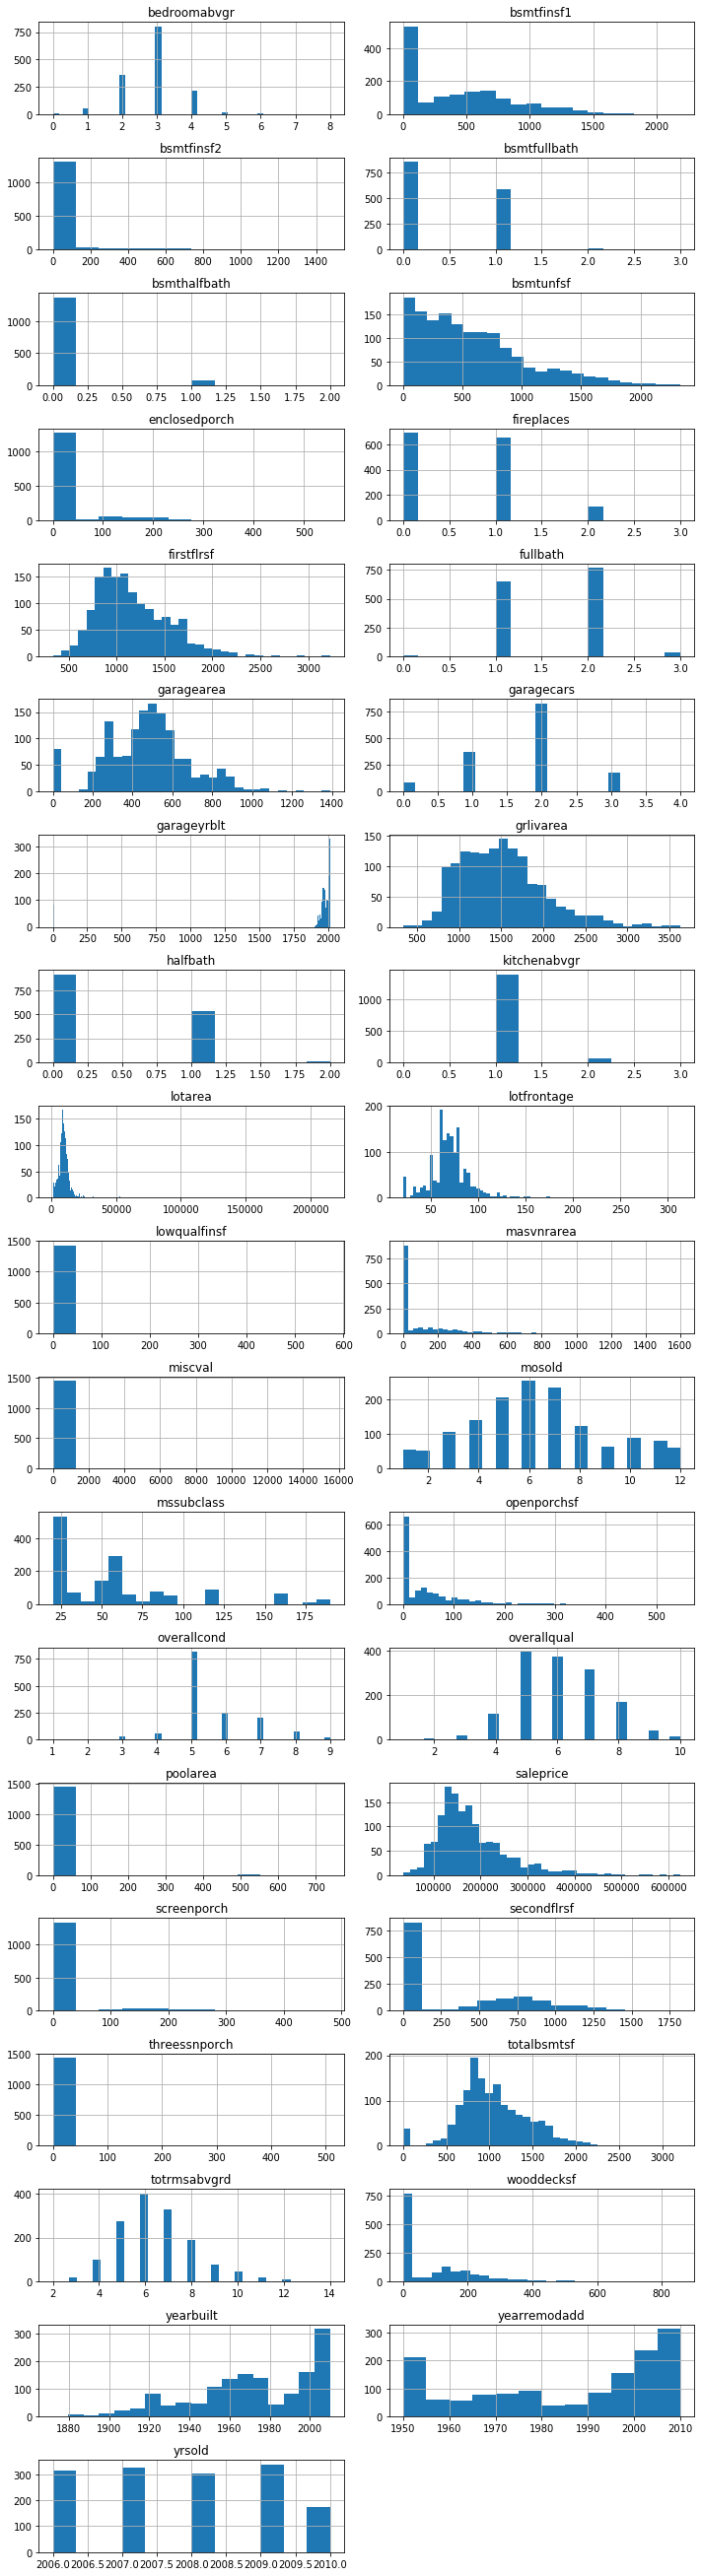

In [20]:
# Check the distributions of the numerical variables.
quantitative_df.hist(figsize=(10,40), layout=(21, 2), bins='auto')
plt. tight_layout()
plt.show()

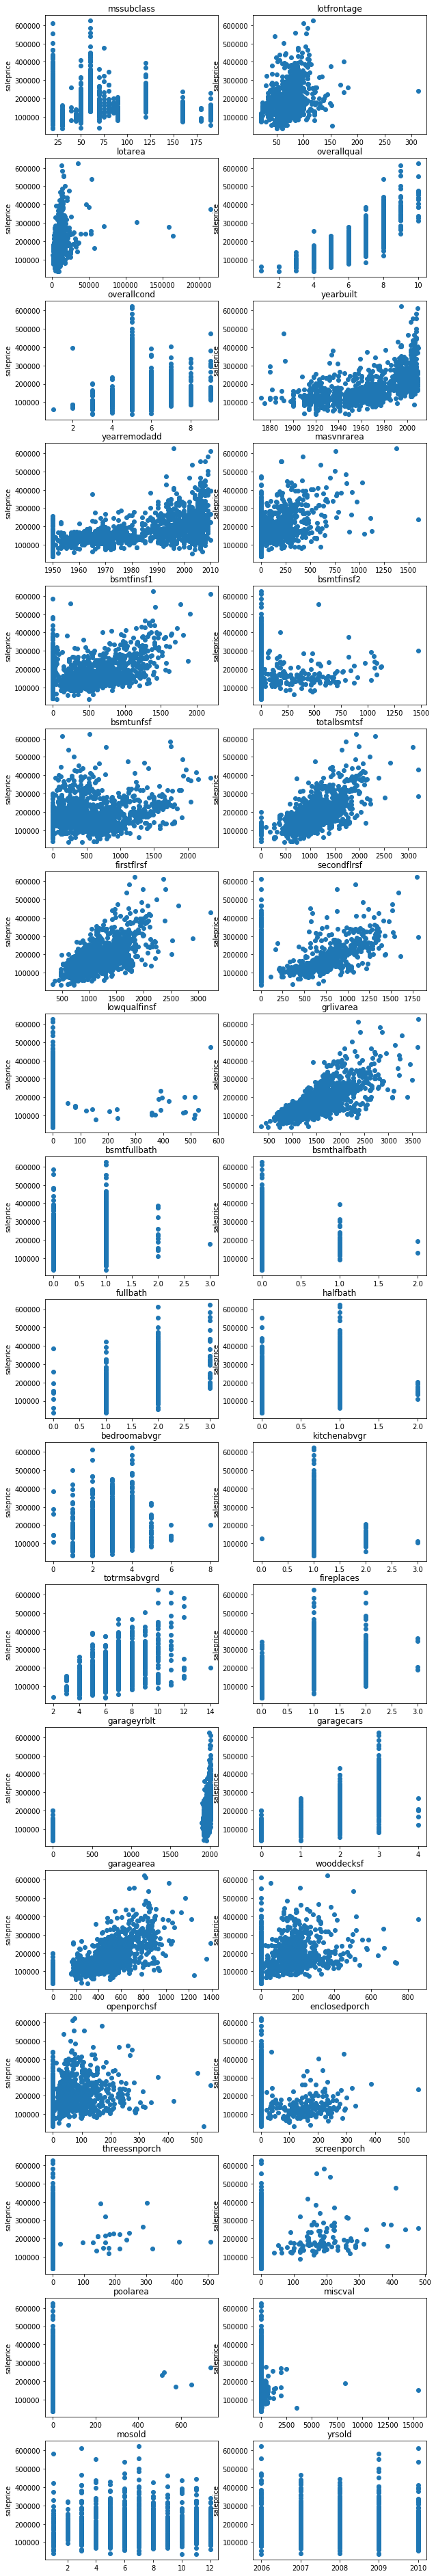

In [21]:
# Scatter plots of saleprice versus each numerical variable.
all_columns = ['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2',
       'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces',
       'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf',
       'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold']

plt.figure(figsize=(10, 80))

for i in range(len(all_columns)):
    plt.subplot(21, 2, i + 1)
    plt.scatter(quantitative_df[all_columns[i]], quantitative_df['saleprice'])
    plt.title(all_columns[i])
    plt.ylabel('saleprice')
plt.show()

Based on the histograms and scatterplots, we can see there are numerical variables that are actually categocial variables.  We can also see there are numerical variables that are skewed.  I will verify there is skewness with some of the variables.  I will address the skewness because it will affect the results of the regression models.

In [22]:
# The following numerical variables are really categorical variables.
# Converting numerical variables to categorical.
house_prices_df['mssubclass'] = house_prices_df['mssubclass'].astype(str)
house_prices_df['overallcond'] = house_prices_df['overallcond'].astype(str)
house_prices_df['yrsold'] = house_prices_df['yrsold'].astype(str)
house_prices_df['mosold'] = house_prices_df['mosold'].astype(str)

In [23]:
# Listing the numerical variables based on their skewness.
# Check the skew of all numerical features
numeric_features = house_prices_df.dtypes[house_prices_df.dtypes != "object"].index

skewed_features = house_prices_df[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'skew' :skewed_features})
skewness.head(20)


Skew in numerical features: 



,skew
miscval,24.418175
poolarea,17.504556
lotarea,12.574590
threessnporch,10.279262
lowqualfinsf,8.989291
kitchenabvgr,4.476748
bsmtfinsf2,4.244209
bsmthalfbath,4.124712
screenporch,4.111400
enclosedporch,3.081275


In [24]:
# Correcting the skewness with Box-Cox transformation.
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform.".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    house_prices_df[feat] = boxcox1p(house_prices_df[feat], lam)

There are 33 skewed numerical features to Box Cox transform.


In [25]:
# Investigate multicollinearity among the numerical variables.
corr_matrix = round(quantitative_df.corr(method='spearman'), 3)
corr_matrix

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
mssubclass,1.000,-0.290,-0.273,0.106,-0.071,0.034,0.006,0.024,-0.111,-0.084,...,0.022,0.030,0.012,-0.036,-0.021,0.029,-0.033,0.019,-0.027,0.006
lotfrontage,-0.290,1.000,0.605,0.236,-0.057,0.180,0.098,0.269,0.176,0.076,...,0.103,0.163,-0.094,0.060,0.045,0.041,0.031,0.020,0.005,0.406
lotarea,-0.273,0.605,1.000,0.227,-0.046,0.099,0.072,0.171,0.165,0.074,...,0.179,0.172,-0.065,0.063,0.094,0.063,0.060,0.008,-0.026,0.455
overallqual,0.106,0.236,0.227,1.000,-0.177,0.646,0.557,0.405,0.126,-0.116,...,0.255,0.432,-0.161,0.034,0.048,0.026,-0.087,0.064,-0.024,0.810
overallcond,-0.071,-0.057,-0.046,-0.177,1.000,-0.417,-0.040,-0.176,-0.010,0.102,...,-0.042,-0.132,0.110,0.032,0.075,0.008,0.087,-0.006,0.050,-0.130
yearbuilt,0.034,0.180,0.099,0.646,-0.417,1.000,0.683,0.393,0.186,-0.111,...,0.286,0.390,-0.408,0.023,-0.072,-0.016,-0.091,0.020,-0.013,0.653
yearremodadd,0.006,0.098,0.072,0.557,-0.040,0.683,1.000,0.226,0.060,-0.125,...,0.229,0.351,-0.235,0.052,-0.045,-0.017,-0.091,0.022,0.046,0.573
masvnrarea,0.024,0.269,0.171,0.405,-0.176,0.393,0.226,1.000,0.234,-0.059,...,0.170,0.201,-0.178,0.042,0.040,-0.007,-0.049,0.020,0.001,0.417
bsmtfinsf1,-0.111,0.176,0.165,0.126,-0.010,0.186,0.060,0.234,1.000,0.052,...,0.174,0.076,-0.147,0.048,0.074,0.027,0.006,-0.015,0.023,0.299
bsmtfinsf2,-0.084,0.076,0.074,-0.116,0.102,-0.111,-0.125,-0.059,0.052,1.000,...,0.071,-0.068,0.041,-0.016,0.058,0.089,0.030,-0.026,0.026,-0.038


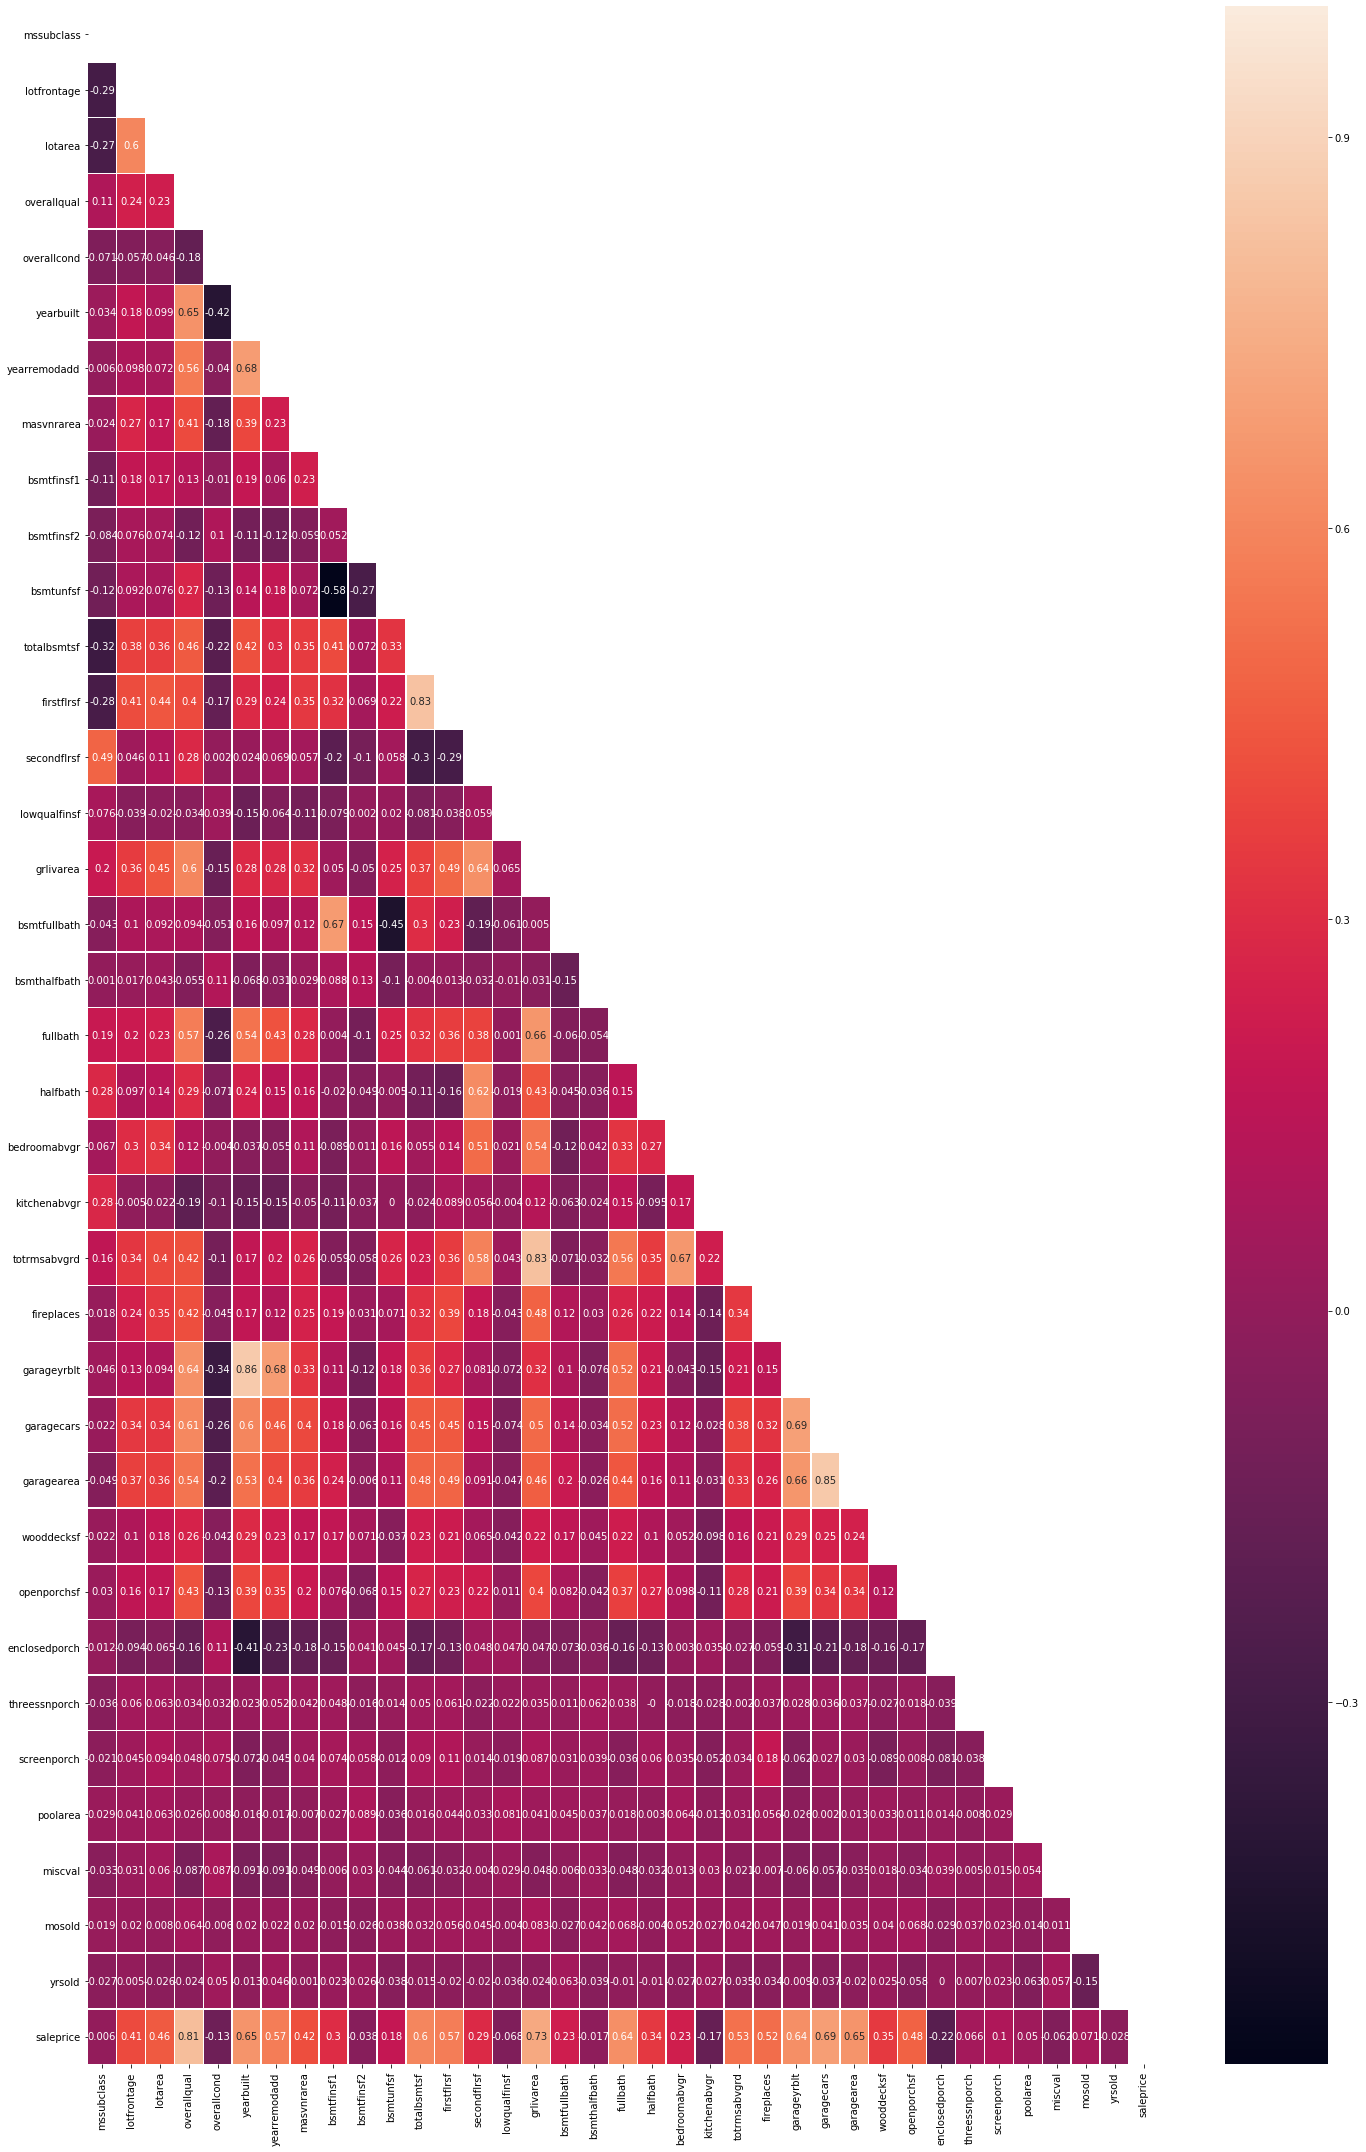

In [26]:
plt.figure(figsize = (20,30))
mask = np.triu(np.ones_like(quantitative_df.corr(), dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, linewidth=0.5)
plt.tight_layout()
plt.show()

In [27]:
# List of correlations from highest to lowest.
corr_matrix['saleprice'].sort_values(ascending=False)

saleprice        1.000
overallqual      0.810
grlivarea        0.731
garagecars       0.690
yearbuilt        0.653
garagearea       0.649
garageyrblt      0.635
fullbath         0.635
totalbsmtsf      0.602
firstflrsf       0.574
yearremodadd     0.573
totrmsabvgrd     0.531
fireplaces       0.518
openporchsf      0.477
lotarea          0.455
masvnrarea       0.417
lotfrontage      0.406
wooddecksf       0.352
halfbath         0.341
bsmtfinsf1       0.299
secondflrsf      0.290
bedroomabvgr     0.232
bsmtfullbath     0.226
bsmtunfsf        0.185
screenporch      0.101
mosold           0.071
threessnporch    0.066
poolarea         0.050
mssubclass       0.006
bsmthalfbath    -0.017
yrsold          -0.028
bsmtfinsf2      -0.038
miscval         -0.062
lowqualfinsf    -0.068
overallcond     -0.130
kitchenabvgr    -0.165
enclosedporch   -0.218
Name: saleprice, dtype: float64

# Target Variable Analysis

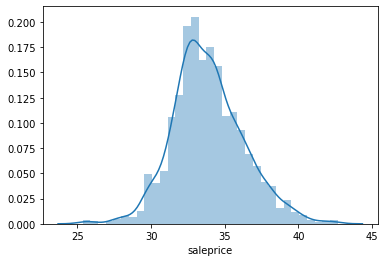

In [28]:
# Check the distribution of the target variable (saleprice).
sns.distplot(house_prices_df['saleprice'])
plt.show()

The target variable appears to be skewed.  I will need to transform it to be approximately normally distributed to meet an assumption of regression.

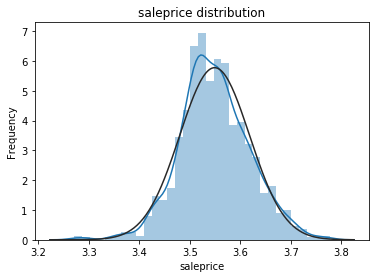

In [29]:
# Use the numpy fuction log1p which applies log(1+x) to 
# the all elements of saleprice column.
house_prices_df["saleprice"] = np.log1p(house_prices_df["saleprice"])

# Verify the new distribution. 
sns.distplot(house_prices_df['saleprice'] , fit=norm);
plt.ylabel('Frequency')
plt.title('saleprice distribution')
plt.show()

# Features Engineering

In [30]:
# Encoding categorical variables. 
from sklearn.preprocessing import LabelEncoder
cols = ['mssubclass', 'overallcond', 'yrsold','mosold']

# Applying LabelEncoder to categorical variables.
for c in cols:
    le = LabelEncoder() 
    le.fit(list(house_prices_df[c])) 
    house_prices_df[c] = le.transform(list(house_prices_df[c]))

# Display the shape of house_prices_df.        
print('Shape house_prices_df: {}'.format(house_prices_df.shape))

Shape house_prices_df: (1456, 79)


In [31]:
# Adding total sqfootage variable because it is important to the value of a house. 
house_prices_df['totalsf'] = house_prices_df['totalbsmtsf'] + house_prices_df['firstflrsf'] + house_prices_df['secondflrsf']

In [32]:
house_prices_df.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,lotconfig,landslope,...,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,totalsf
0,9,RL,5.831328,19.212182,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,None,0.0,4,2,WD,Normal,3.588810,35.071435
1,4,RL,6.221214,19.712205,Pave,None,Reg,Lvl,FR2,Gtl,...,None,None,None,0.0,7,1,WD,Normal,3.564711,25.584552
2,9,RL,5.914940,20.347241,Pave,None,IR1,Lvl,Inside,Gtl,...,None,None,None,0.0,11,2,WD,Normal,3.600853,35.508677
3,10,RL,5.684507,19.691553,Pave,None,IR1,Lvl,Corner,Gtl,...,None,None,None,0.0,4,0,WD,Abnorml,3.519380,34.721871
4,9,RL,6.314735,21.325160,Pave,None,IR1,Lvl,FR2,Gtl,...,None,None,None,0.0,3,2,WD,Normal,3.620235,37.292541


In [33]:
# Convert categoricals into numerical variables with OneHotEncoding.
house_prices_df = pd.get_dummies(house_prices_df)
house_prices_df.shape

(1456, 301)

In [34]:
house_prices_df.head()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,...,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,9,5.831328,19.212182,2.440268,4,14.187527,14.187527,8.059126,11.170327,0.0,...,0,0,0,1,0,0,0,0,1,0
1,4,6.221214,19.712205,2.259674,7,14.145138,14.145138,0.000000,12.062832,0.0,...,0,0,0,1,0,0,0,0,1,0
2,9,5.914940,20.347241,2.440268,4,14.184404,14.185966,7.646538,10.200343,0.0,...,0,0,0,1,0,0,0,0,1,0
3,10,5.684507,19.691553,2.440268,4,14.047529,14.135652,0.000000,8.274266,0.0,...,0,0,0,1,1,0,0,0,0,0
4,9,6.314735,21.325160,2.602594,4,14.182841,14.182841,9.391827,10.971129,0.0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
house_prices_df.columns

Index(['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2',
       ...
       'saletype_ConLw', 'saletype_New', 'saletype_Oth', 'saletype_WD',
       'salecondition_Abnorml', 'salecondition_AdjLand',
       'salecondition_Alloca', 'salecondition_Family', 'salecondition_Normal',
       'salecondition_Partial'],
      dtype='object', length=301)

# Building Regression Models

In [36]:
# Y is the target variable, in other words what are trying to predict.
Y = house_prices_df['saleprice']

In [37]:
# X is the feature set we are using to predict the medical costs
X = house_prices_df.drop(['saleprice'], axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1164
The number of observations in test set is 292


In [39]:
X_train.head()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,...,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
1037,9,5.968981,19.561419,2.602594,4,14.184404,14.185966,9.691225,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
452,4,5.744420,28.927494,2.440268,4,14.143559,14.143559,0.000000,10.971129,0.000000,...,0,0,0,1,0,0,0,0,1,0
1060,0,5.012077,17.195878,2.602594,4,14.184404,14.184404,0.000000,10.809715,0.000000,...,0,0,0,1,0,0,0,0,1,0
708,9,5.831328,19.465926,2.440268,4,14.193765,14.193765,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
166,3,5.744420,19.916216,2.055642,6,14.087847,14.181278,0.000000,9.398681,7.885225,...,0,0,0,1,0,0,0,0,1,0


In [40]:
X_test.head()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,...,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
418,10,6.360100,23.290931,2.259674,5,14.052390,14.103852,0.000000,12.467644,0.000000,...,0,0,0,1,0,0,0,0,1,0
378,9,6.694191,20.308548,2.602594,4,14.189087,14.190647,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
144,4,6.172972,20.005704,2.440268,4,14.181278,14.181278,7.909100,11.066450,0.000000,...,0,0,0,1,0,0,0,0,1,0
173,1,5.133567,17.467711,2.440268,6,14.162467,14.162467,0.000000,10.246736,8.263918,...,0,0,0,1,0,0,0,0,1,0
323,9,6.360100,20.023090,2.440268,4,14.160895,14.162467,7.774945,4.380946,13.250499,...,0,0,0,1,0,0,0,0,1,0


In [41]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [42]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.9498235674301562
-----Test set statistics-----
R-squared of the model in test set is: 0.9047461185025847
Mean absolute error of the prediction is: 0.015506914677719662
Mean squared error of the prediction is: 0.0004646639209859673
Root mean squared error of the prediction is: 0.021556064598761235
Mean absolute percentage error of the prediction is: 0.4390915880750915


In [43]:
# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     72.80
Date:                Wed, 25 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:55:16   Log-Likelihood:                 3204.2
No. Observations:                1164   AIC:                            -5926.
Df Residuals:                     923   BIC:                            -4707.
Df Model:                         240                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.13

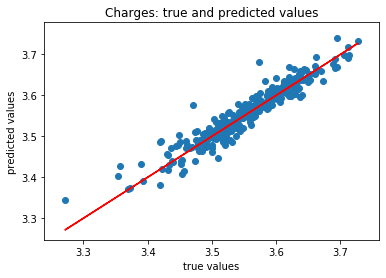

Mean absolute error of the prediction is: 0.015877645850208174
Mean squared error of the prediction is: 0.0004988377966454517
Root mean squared error of the prediction is: 0.022334676998905796
Mean absolute percentage error of the prediction is: 0.44938396859548585


In [44]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


# Ridge Regression Models

In [45]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0018113571820475014
Mean absolute error of the prediction is: 0.055043795765344
Mean squared error of the prediction is: 0.00488699868182395
Root mean squared error of the prediction is: 0.0699070717583275
Mean absolute percentage error of the prediction is: 1.5526588671549806


In [46]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 10.0
R-squared of the model in training set is: 0.939250683430526
-----Test set statistics-----
R-squared of the model in test set is: 0.9247175528054841
Mean absolute error of the prediction is: 0.014116975152987096
Mean squared error of the prediction is: 0.0003672400173610985
Root mean squared error of the prediction is: 0.019163507438908423
Mean absolute percentage error of the prediction is: 0.39951257305147075


In [47]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

ridge_cv = RidgeCV(alphas=alphas, cv=10)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 10.0
R-squared of the model in training set is: 0.939250683430526
-----Test set statistics-----
R-squared of the model in test set is: 0.9247175528054841
Mean absolute error of the prediction is: 0.014116975152987096
Mean squared error of the prediction is: 0.0003672400173610985
Root mean squared error of the prediction is: 0.019163507438908423
Mean absolute percentage error of the prediction is: 0.39951257305147075


# Lasso Regression Models

In [48]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0018113571820475014
Mean absolute error of the prediction is: 0.055043795765344
Mean squared error of the prediction is: 0.00488699868182395
Root mean squared error of the prediction is: 0.0699070717583275
Mean absolute percentage error of the prediction is: 1.5526588671549806


In [49]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.9329963395057052
-----Test set statistics-----
R-squared of the model in test set is: 0.9256963149932963
Mean absolute error of the prediction is: 0.014547325905719388
Mean squared error of the prediction is: 0.0003624654562749553
Root mean squared error of the prediction is: 0.01903852558038451
Mean absolute percentage error of the prediction is: 0.4116921635602071


In [50]:
lasso_cv = LassoCV(alphas=alphas, cv=10)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.9329963395057052
-----Test set statistics-----
R-squared of the model in test set is: 0.9256963149932963
Mean absolute error of the prediction is: 0.014547325905719388
Mean squared error of the prediction is: 0.0003624654562749553
Root mean squared error of the prediction is: 0.01903852558038451
Mean absolute percentage error of the prediction is: 0.4116921635602071


# ElasticNet Regression Models

In [51]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0018113571820475014
Mean absolute error of the prediction is: 0.055043795765344
Mean squared error of the prediction is: 0.00488699868182395
Root mean squared error of the prediction is: 0.0699070717583275
Mean absolute percentage error of the prediction is: 1.5526588671549806


In [52]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.9395190034558102
-----Test set statistics-----
R-squared of the model in test set is: 0.9262948409714815
Mean absolute error of the prediction is: 0.014451251767760211
Mean squared error of the prediction is: 0.00035954574924083253
Root mean squared error of the prediction is: 0.018961691623925133
Mean absolute percentage error of the prediction is: 0.4087750489765031


In [53]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=10)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.9395190034558102
-----Test set statistics-----
R-squared of the model in test set is: 0.9262948409714815
Mean absolute error of the prediction is: 0.014451251767760211
Mean squared error of the prediction is: 0.00035954574924083253
Root mean squared error of the prediction is: 0.018961691623925133
Mean absolute percentage error of the prediction is: 0.4087750489765031


# Conclusion

I executed several regressions on the house_prices_df from Ames, Iowa data set to determine which model provides the highest r-squared and adjusted r-squared and lowest Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and Mean Absolute Percentage Error metrics in predicting house prices.  The regressions I executed were linear regression, ordinary least squared (OLS), lasso, ridge, elasticnet, lassocv, ridgecv, and elasticnetcv.  

The lasso, ridge, and elasticnet overfitted the model, so I executed cross validation on all three regressions to correct for the overfitting.  After applying cross validation, the metrics of all three models improved.  However, none of the three models had the best metrics.  The OLS model had the best metrics.  I would go with the OLS model with caution.  I want to find some more data the model has not seen to predict house prices to verify the model is the best.

# Additional Data

I want to see what happens to the results of the models based on the Ames, IA house price data after adding the three features: 

Total_Employed - Total number of people employed from 1990 - 2019 quarterly in Ames, IA

Unemployed - Unemployment rates from 1990 - 2019 monthly in Ames, IA

House_Price_Index - House Price Index in Ames, IA 

References:
House Price Index
https://fred.stlouisfed.org/series/ATNHPIUS11180Q?utm_source=series_page&utm_medium=related_content&utm_term=related_resources&utm_campaign=categories

Unemployment Rates
https://fred.stlouisfed.org/series/AMES119URN

Total Employed
https://fred.stlouisfed.org/series/ENUC111830010SA

In [54]:
# Create dataframe of the three additional features.
extra_df = pd.read_csv('house_extra_data.csv')

In [55]:
# Display the top rows.
extra_df.head()

,Total_Employed,Unemployed,House_Price_Index
0,148510886.3,3.9,67.46
1,158548285.9,3.5,67.75
2,161709082.6,3.3,70.19
3,163438325.6,3.0,69.05
4,165587187.0,3.4,68.98


In [56]:
# Display the columns information.
extra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 3 columns):
Total_Employed       118 non-null float64
Unemployed           358 non-null float64
House_Price_Index    132 non-null float64
dtypes: float64(3)
memory usage: 8.5 KB


In [57]:
# Merge house_prices_df and extra_df on indexes.
house_prices_df = pd.merge(house_prices_df, extra_df, right_index=True, left_index=True)

In [58]:
# Verify the merge occurred.
house_prices_df.head()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,...,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,Total_Employed,Unemployed,House_Price_Index
0,9,5.831328,19.212182,2.440268,4,14.187527,14.187527,8.059126,11.170327,0.0,...,1,0,0,0,0,1,0,148510886.3,3.9,67.46
1,4,6.221214,19.712205,2.259674,7,14.145138,14.145138,0.000000,12.062832,0.0,...,1,0,0,0,0,1,0,158548285.9,3.5,67.75
2,9,5.914940,20.347241,2.440268,4,14.184404,14.185966,7.646538,10.200343,0.0,...,1,0,0,0,0,1,0,161709082.6,3.3,70.19
3,10,5.684507,19.691553,2.440268,4,14.047529,14.135652,0.000000,8.274266,0.0,...,1,1,0,0,0,0,0,163438325.6,3.0,69.05
4,9,6.314735,21.325160,2.602594,4,14.182841,14.182841,9.391827,10.971129,0.0,...,1,0,0,0,0,1,0,165587187.0,3.4,68.98


In [59]:
# Imputing the three columns with filling median.
house_prices_df['Total_Employed'] = house_prices_df['Total_Employed'].fillna(house_prices_df['Total_Employed'].median())

In [60]:
house_prices_df['Unemployed'] = house_prices_df['Unemployed'].fillna(house_prices_df['Unemployed'].median())

In [61]:
house_prices_df['House_Price_Index'] = house_prices_df['House_Price_Index'].fillna(house_prices_df['House_Price_Index'].median())

In [62]:
house_prices_df.tail()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,...,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,Total_Employed,Unemployed,House_Price_Index
353,8,5.684507,19.494522,2.055642,5,14.089451,14.103852,0.000000,8.473163,9.590598,...,0,0,0,0,0,1,0,339510300.2,2.3,143.95
354,5,5.684507,19.244223,2.259674,7,14.068550,14.187527,0.000000,0.000000,0.000000,...,1,0,0,0,0,1,0,339510300.2,2.2,143.95
355,8,5.684507,19.189158,2.259674,4,14.087847,14.182841,0.000000,9.641351,0.000000,...,1,0,0,0,0,1,0,339510300.2,1.9,143.95
356,4,6.751853,20.346881,2.259674,4,14.175018,14.175018,0.000000,9.279836,10.487444,...,1,0,0,0,0,1,0,339510300.2,1.5,143.95
357,4,5.831328,19.564823,2.259674,5,14.170316,14.170316,6.770766,10.562060,0.000000,...,1,0,0,0,0,1,0,339510300.2,1.3,143.95


# Evaluate Models With Additional Features

In [63]:
# Y is the target variable, in other words what are trying to predict.
Y = house_prices_df['saleprice']

In [64]:
# X is the feature set we are using to predict the medical costs
X = house_prices_df.drop(['saleprice'], axis=1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 286
The number of observations in test set is 72


In [66]:
X_train.head()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,...,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,Total_Employed,Unemployed,House_Price_Index
352,0,6.221214,17.443769,2.440268,4,14.160895,14.160895,0.000000,12.348626,0.0,...,1,1,0,0,0,0,0,339510300.2,1.5,143.95
97,4,6.047664,20.227251,1.820334,4,14.127727,14.127727,5.285266,10.371953,0.0,...,1,0,0,0,0,1,0,497062924.9,2.4,162.69
220,0,5.093857,15.500764,2.440268,4,14.190647,14.192207,3.530419,3.530419,0.0,...,0,0,0,0,0,0,1,339510300.2,3.0,143.95
170,4,6.337529,21.988245,2.602594,5,14.153025,14.153025,10.963053,0.000000,0.0,...,1,0,0,0,0,1,0,339510300.2,2.8,143.95
282,4,5.684507,18.598238,2.259674,4,14.192207,14.192207,5.914940,11.846383,0.0,...,0,0,0,0,0,0,1,339510300.2,3.9,143.95


In [67]:
X_test.head()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,...,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,Total_Employed,Unemployed,House_Price_Index
177,9,6.594833,19.885739,2.259674,4,14.164038,14.165608,8.763534,11.611273,0.000000,...,1,0,0,0,0,1,0,339510300.2,2.8,143.95
198,11,7.799866,23.860400,2.602594,3,14.052390,14.167178,0.000000,12.225230,7.920955,...,1,1,0,0,0,0,0,339510300.2,2.7,143.95
204,0,5.968981,16.829743,2.259674,4,14.189087,14.189087,8.158133,10.999233,0.000000,...,1,0,0,0,0,1,0,339510300.2,2.9,143.95
200,4,6.123681,19.708494,2.602594,4,14.189087,14.190647,8.711413,12.364391,0.000000,...,1,0,0,0,0,1,0,339510300.2,2.5,143.95
131,9,6.404587,21.307463,2.440268,5,14.129314,14.129314,9.095394,9.979298,0.000000,...,1,0,0,0,0,1,0,339510300.2,1.9,219.05


In [68]:
X_train = sm.add_constant(X_train)

In [69]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.9918492510527681
-----Test set statistics-----
R-squared of the model in test set is: 0.5317412413632312
Mean absolute error of the prediction is: 0.031175789611438957
Mean squared error of the prediction is: 0.0022093596803038785
Root mean squared error of the prediction is: 0.047003826230466374
Mean absolute percentage error of the prediction is: 0.8787388084118575


In [70]:
# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     39.62
Date:                Wed, 25 Dec 2019   Prob (F-statistic):           6.17e-41
Time:                        16:55:31   Log-Likelihood:                 1046.4
No. Observations:                 286   AIC:                            -1661.
Df Residuals:                      70   BIC:                            -871.2
Df Model:                         215                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
mssubclass               -0.00

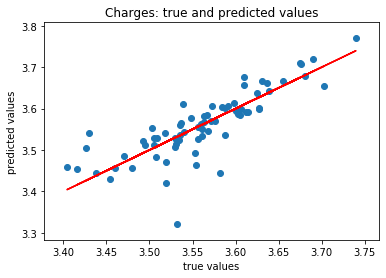

Mean absolute error of the prediction is: 0.03083765944143573
Mean squared error of the prediction is: 0.0021053514470308096
Root mean squared error of the prediction is: 0.04588410887258038
Mean absolute percentage error of the prediction is: 0.8690964260439363


In [71]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


# Ridge Regression Models

In [72]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.015138318087736023
Mean absolute error of the prediction is: 0.05386290720636242
Mean squared error of the prediction is: 0.0047896715833868585
Root mean squared error of the prediction is: 0.06920745323581022
Mean absolute percentage error of the prediction is: 1.5100504775727244


In [73]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 100.0
R-squared of the model in training set is: 0.8722805445711379
-----Test set statistics-----
R-squared of the model in test set is: 0.8551990390852211
Mean absolute error of the prediction is: 0.019502706181188243
Mean squared error of the prediction is: 0.0006832064511633234
Root mean squared error of the prediction is: 0.026138218209421304
Mean absolute percentage error of the prediction is: 0.5490255585475651


In [74]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

ridge_cv = RidgeCV(alphas=alphas, cv=10)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 100.0
R-squared of the model in training set is: 0.8722805445711379
-----Test set statistics-----
R-squared of the model in test set is: 0.8551990390852211
Mean absolute error of the prediction is: 0.019502706181188243
Mean squared error of the prediction is: 0.0006832064511633234
Root mean squared error of the prediction is: 0.026138218209421304
Mean absolute percentage error of the prediction is: 0.5490255585475651


# Lasso Regression Models

In [75]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.015138318087736023
Mean absolute error of the prediction is: 0.05386290720636242
Mean squared error of the prediction is: 0.0047896715833868585
Root mean squared error of the prediction is: 0.06920745323581022
Mean absolute percentage error of the prediction is: 1.5100504775727244


In [76]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.001
R-squared of the model in training set is: 0.9134717584272469
-----Test set statistics-----
R-squared of the model in test set is: 0.9015417186970857
Mean absolute error of the prediction is: 0.016036359875697737
Mean squared error of the prediction is: 0.0004645503215699912
Root mean squared error of the prediction is: 0.0215534294619207
Mean absolute percentage error of the prediction is: 0.4519454384749279


In [77]:
lasso_cv = LassoCV(alphas=alphas, cv=10)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.001
R-squared of the model in training set is: 0.9134717584272469
-----Test set statistics-----
R-squared of the model in test set is: 0.9015417186970857
Mean absolute error of the prediction is: 0.016036359875697737
Mean squared error of the prediction is: 0.0004645503215699912
Root mean squared error of the prediction is: 0.0215534294619207
Mean absolute percentage error of the prediction is: 0.4519454384749279


# ElasticNet Regression Models

In [78]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.015138318087736023
Mean absolute error of the prediction is: 0.05386290720636242
Mean squared error of the prediction is: 0.0047896715833868585
Root mean squared error of the prediction is: 0.06920745323581022
Mean absolute percentage error of the prediction is: 1.5100504775727244


In [79]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.001
R-squared of the model in training set is: 0.9331127639313831
-----Test set statistics-----
R-squared of the model in test set is: 0.9151947618950261
Mean absolute error of the prediction is: 0.015016408330158104
Mean squared error of the prediction is: 0.0004001319148694026
Root mean squared error of the prediction is: 0.02000329759988094
Mean absolute percentage error of the prediction is: 0.4234663415791225


In [80]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=10)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.001
R-squared of the model in training set is: 0.9331127639313831
-----Test set statistics-----
R-squared of the model in test set is: 0.9151947618950261
Mean absolute error of the prediction is: 0.015016408330158104
Mean squared error of the prediction is: 0.0004001319148694026
Root mean squared error of the prediction is: 0.02000329759988094
Mean absolute percentage error of the prediction is: 0.4234663415791225


# Conclusion After Adding Features

After I added the three features, the r-squared and adjusted r-squared values increased by .02 to .05 across all the models.  The error metrics decreased as well.  By adding macroeconomic data, the models' prediction power improved.  There is one concern I have is with the Linear Regression model.  The r-squared with the training data was about 0.99 and with testing data about 0.53.  I think the other regression models corrected for the overfitting.  I will still stay with OLS model for predicting housing price data in Ames, IA.  